In [30]:
# Multiple Linear Regression
# Importing the libraries
import numpy as np # Maths
import matplotlib.pyplot as plt # Plot charts
import pandas as pd # Import/manage datasets
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns


# Importing the datasets
# Train datasets
X_train = np.array(pd.read_csv('../../Data/Regression Models/X_train.csv'))
y_train = np.array(pd.read_csv('../../Data/Regression Models/y_train.csv'))

# X_train[X_train.argsort()]

#X_train = X_train[:, :4]
y_train = y_train[:, 1]

# Test datasets
X_test = np.array(pd.read_csv('../../Data/Regression Models/X_test.csv'))


# X_train = (X_train - np.mean(X_train))/np.std(X_train)
# X_test = (X_test - np.mean(X_test))/np.std(X_test)


In [57]:
model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression(normalize=True))
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

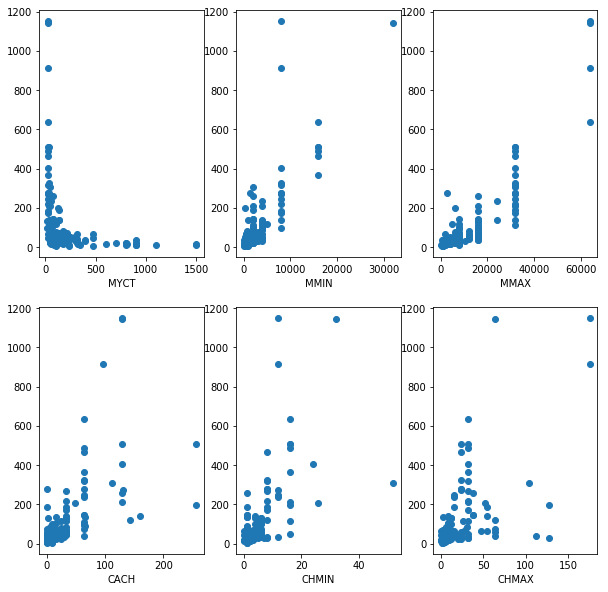

In [64]:
columns = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']

fig = plt.figure(figsize=(10, 10))

for i in range((X_train.shape[1])):
    ax = fig.add_subplot(2, 3, i+1)
    ax.scatter(X_train[:, i], y_train)
#     ax.scatter(X_train[:, i], y_pred, color='r', alpha=0.2)
    ax.set_xlabel(columns[i])

In [8]:
X_train.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,125,256,6000,256,16,128
1,29,8000,32000,32,8,32
2,29,8000,32000,32,8,32
3,29,8000,32000,32,8,32
4,26,8000,32000,64,8,32


In [ ]:
from sklearn.linear_model import LinearRegression
train_copy = train[['MYCT', 'MMIN','MMAX','CACH', 'CHMIN', 'CHMAX']]
train_copy =pd.get_dummies(train_copy)
train_copy=train_copy.fillna(0)
linear_regr_test = LinearRegression()

fig, axes = plt.subplots(1,len(train_copy.columns.values),sharey=True,constrained_layout=True,figsize=(30,15))

for i,e in enumerate(train_copy.columns):
  linear_regr_test.fit(train_copy[e].values[:,np.newaxis], y.values)
  axes[i].set_title("Best fit line")
  axes[i].set_xlabel(str(e))
  axes[i].set_ylabel('SalePrice')
  axes[i].scatter(train_copy[e].values[:,np.newaxis], y,color='g')
  axes[i].plot(train_copy[e].values[:,np.newaxis], 
  linear_regr_test.predict(train_copy[e].values[:,np.newaxis]),color='k')